In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [2]:
df = pd.read_csv('titanic.csv')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.drop(['pclass', 'sibsp' , 'parch', 'embarked', 'adult_male','deck'], axis=1,inplace=True)
df

,survived,sex,age,fare,class,who,embark_town,alive,alone
0,0,male,22.0,7.2500,Third,man,Southampton,no,False
1,1,female,38.0,71.2833,First,woman,Cherbourg,yes,False
2,1,female,26.0,7.9250,Third,woman,Southampton,yes,True
3,1,female,35.0,53.1000,First,woman,Southampton,yes,False
4,0,male,35.0,8.0500,Third,man,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,13.0000,Second,man,Southampton,no,True
887,1,female,19.0,30.0000,First,woman,Southampton,yes,True
888,0,female,NaN,23.4500,Third,woman,Southampton,no,False
889,1,male,26.0,30.0000,First,man,Cherbourg,yes,True


In [4]:
df.info()
# We have null object in 'age' ,'embark_town'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   sex          891 non-null    object 
 2   age          714 non-null    float64
 3   fare         891 non-null    float64
 4   class        891 non-null    object 
 5   who          891 non-null    object 
 6   embark_town  889 non-null    object 
 7   alive        891 non-null    object 
 8   alone        891 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 56.7+ KB


# Data processing

In [5]:
df['embark_town'].fillna('No town',inplace = True)
df['age'].fillna(df['age'].median(),inplace = True)

In [6]:
df.info()
# Done

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   sex          891 non-null    object 
 2   age          891 non-null    float64
 3   fare         891 non-null    float64
 4   class        891 non-null    object 
 5   who          891 non-null    object 
 6   embark_town  891 non-null    object 
 7   alive        891 non-null    object 
 8   alone        891 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 56.7+ KB


In [7]:
df.describe()

,survived,age,fare
count,891.000000,891.000000,891.000000
mean,0.383838,29.361582,32.204208
std,0.486592,13.019697,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,22.000000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,35.000000,31.000000
max,1.000000,80.000000,512.329200


<AxesSubplot:xlabel='class', ylabel='count'>

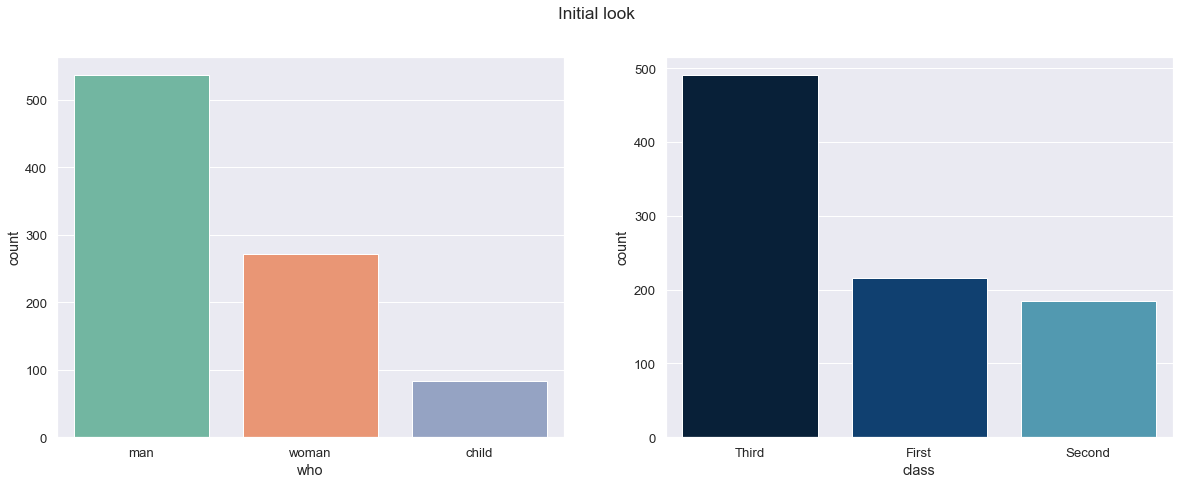

In [8]:
fig, axes = plt.subplots(1,2 , figsize= (20,7)) 
fig.suptitle ('Initial look')
sns.countplot(ax=axes [0] ,x='who',data=df ,palette='Set2')
sns.countplot(ax=axes [1] ,x= 'class',data=df,palette='ocean')

#                                            Number of deaths

<AxesSubplot:xlabel='survived', ylabel='count'>

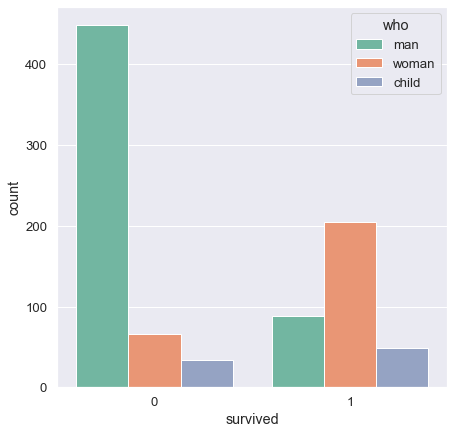

In [9]:
sns.countplot(x='survived',data= df ,palette='Set2',hue='who')

# Why is male mortality higher?

In [10]:
df[(df['who'] == 'man') & (df['survived'] == 0)].shape[0]

449

In [11]:
df[(df['who'] == 'man') & (df['survived'] == 0) & (df['alone'] == True)].shape[0]

346

In [12]:
df[(df['who'] == 'man') & (df['survived'] == 0) & (df['alone'] == False)].shape[0]

103

In [13]:
men01 = df[(df['who'] == 'man') & (df['survived'] == 0) & (df['alone'] == True)]

men00 = df[(df['who'] == 'man') & (df['survived'] == 0) & (df['alone'] == False)]

# men's deaths

Text(0.5, 1.0, 'Deaths & not alone')

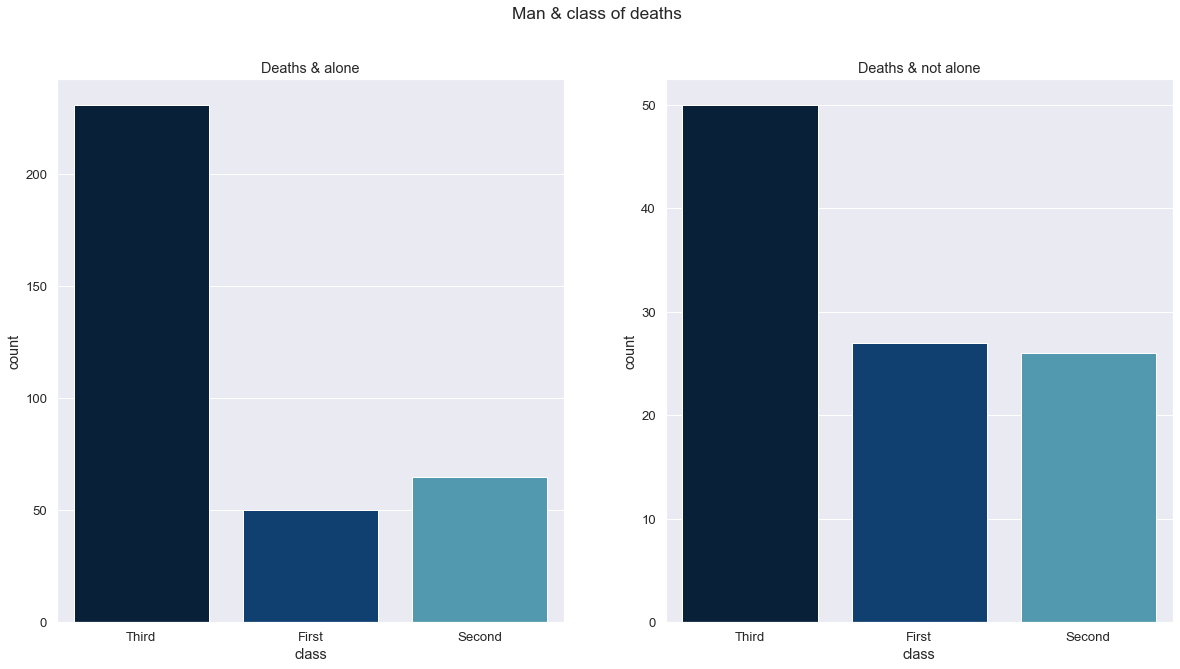

In [14]:
fig, axes = plt.subplots(1,2 , figsize= (20,10)) 
fig.suptitle ("Man & class of deaths")
sns.countplot(ax=axes [0] ,x='class',data= men01, palette='ocean').set_title('Deaths & alone')
sns.countplot(ax=axes [1] ,x= 'class',data= men00, palette='ocean').set_title('Deaths & not alone')

# Men's survive

In [15]:
men11 = df[(df['who'] == 'man') & (df['survived'] == 1) & (df['alone'] == True)]

men10 = df[(df['who'] == 'man') & (df['survived'] == 1) & (df['alone'] == False)]

Text(0.5, 1.0, 'not alone')

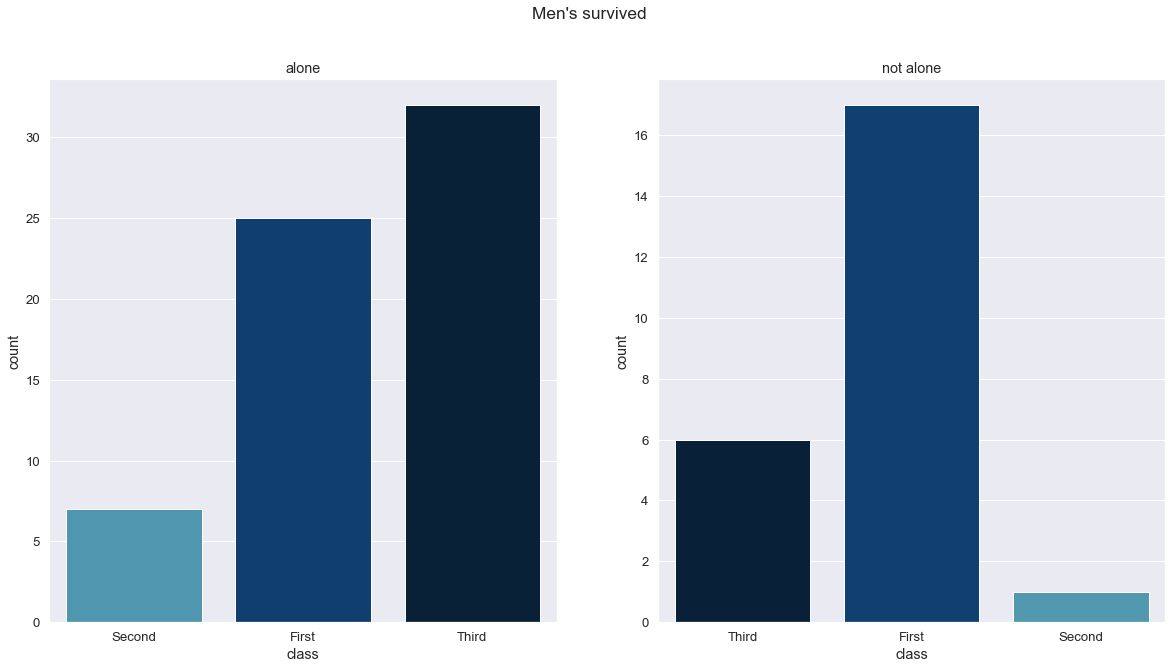

In [16]:
fig, axes = plt.subplots(1,2 , figsize= (20,10)) 
fig.suptitle ("Men's survived")
sns.countplot(ax=axes [0] ,x='class',data= men11, palette='ocean_r').set_title('alone')
sns.countplot(ax=axes [1] ,x='class',data= men10, palette='ocean').set_title('not alone')

Text(0.5, 1.0, "Men's survived & not alone")

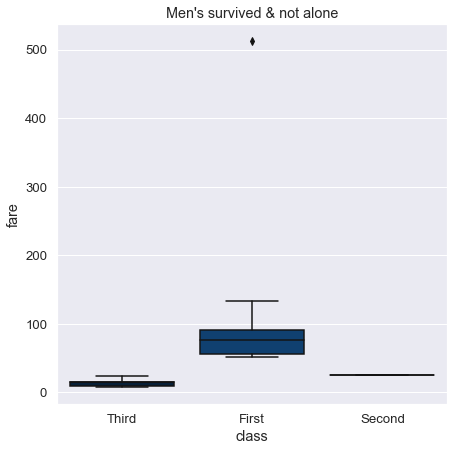

In [17]:
sns.boxplot(x= 'class', y ='fare', data= men10 , palette='ocean').set_title("Men's survived & not alone")

<AxesSubplot:xlabel='survived', ylabel='age'>

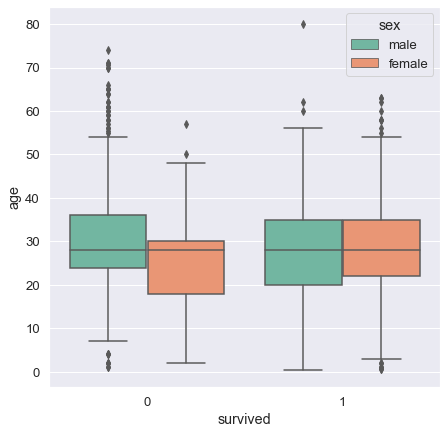

In [18]:
sns.boxplot(x= 'survived', y ='age', data=df, hue= 'sex',palette='Set2')

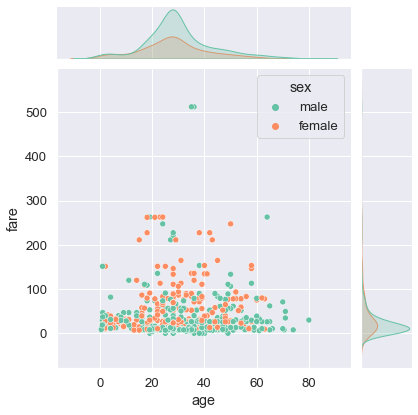

In [19]:
sns.jointplot(x='age',y= 'fare',data=df,hue='sex',palette='Set2')

<AxesSubplot:xlabel='embark_town', ylabel='count'>

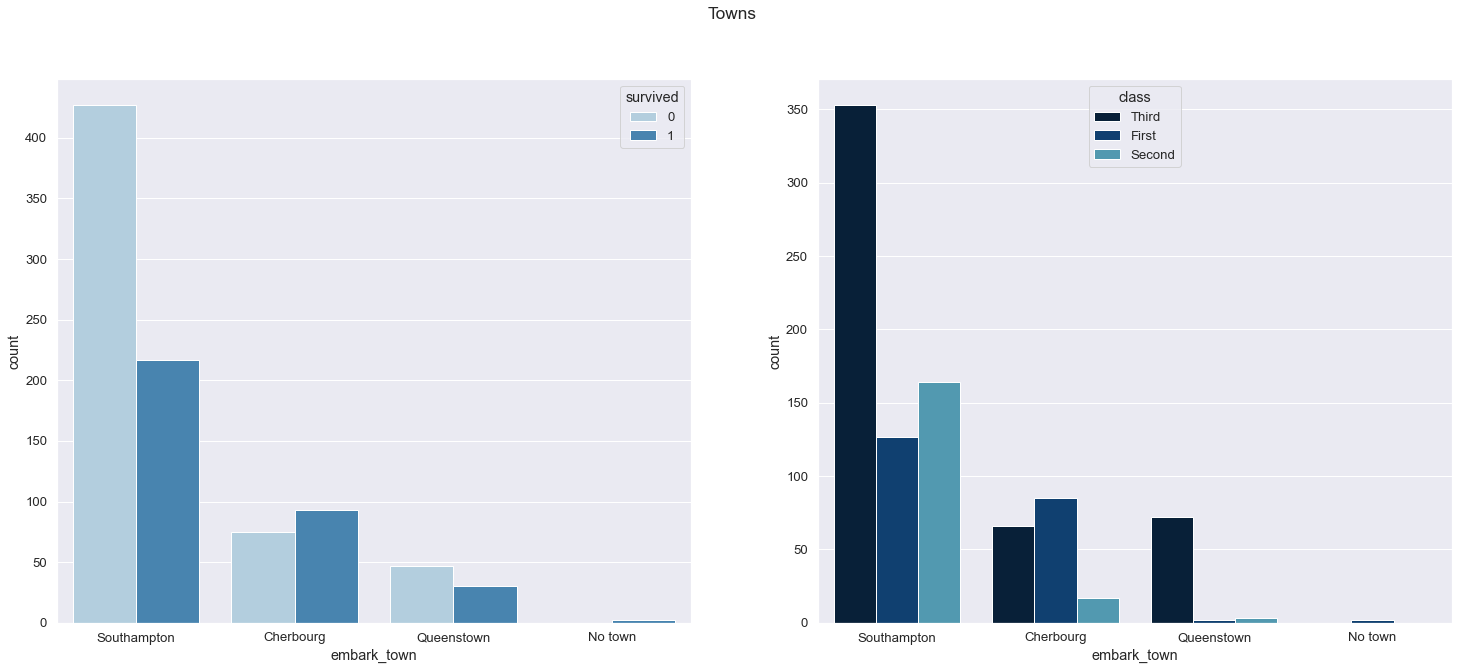

In [20]:
fig, axes = plt.subplots(1,2 , figsize= (25,10)) 
fig.suptitle ('Towns')
sns.countplot(ax=axes [1] ,x='embark_town',data=df, hue='class',palette='ocean')
sns.countplot(ax=axes [0] ,x='embark_town',data=df, hue='survived',palette='Blues')
# delete

# town 1

In [21]:
tw1 = df[(df['embark_town'] == 'Queenstown') & (df['class'] == 'Third')]

Text(0.5, 1.0, 'Alive')

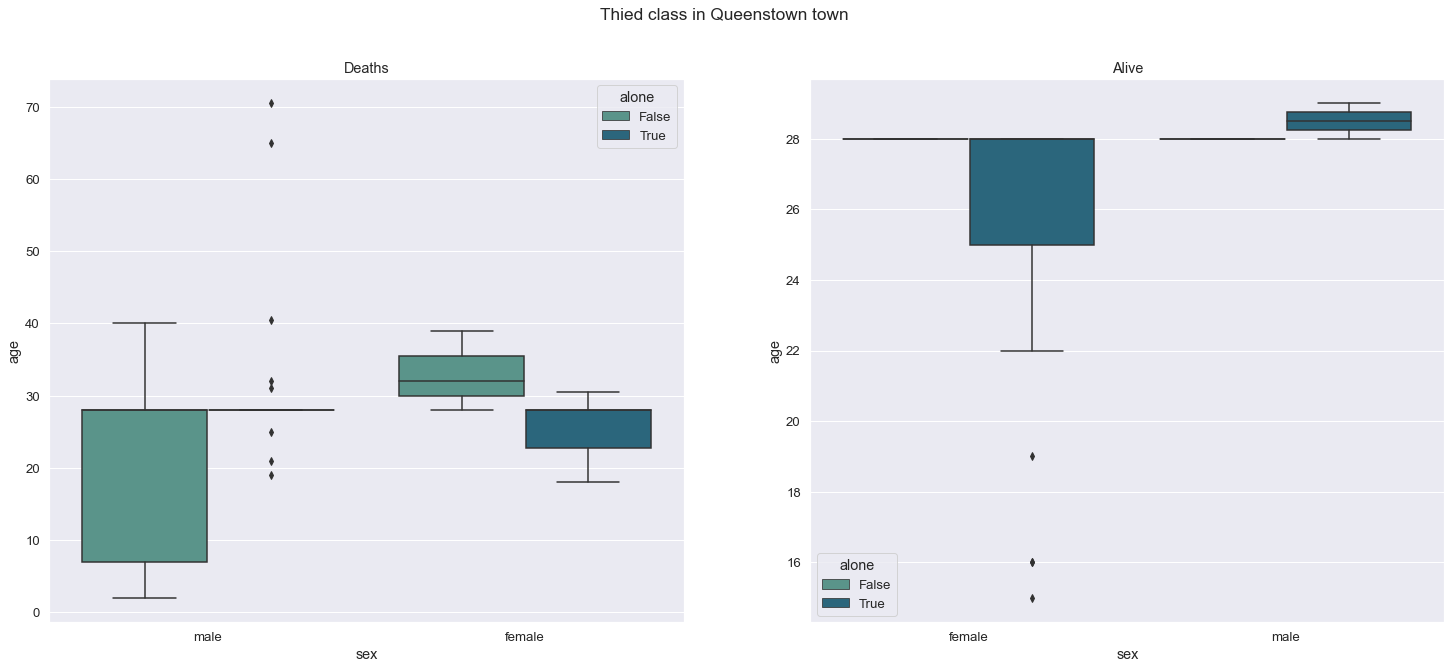

In [22]:
ag10 = tw1[tw1['survived'] == 0]
ag11 = tw1[tw1['survived'] == 1]
fig, axes = plt.subplots(1,2 , figsize= (25,10)) 
fig.suptitle ('Thied class in Queenstown town')
sns.boxplot(ax=axes [0] ,x='sex',y = 'age',data=ag10, hue='alone',palette='crest').set_title('Deaths')
sns.boxplot(ax=axes [1] ,x='sex',y = 'age',data=ag11, hue='alone',palette='crest').set_title('Alive')

Text(0.5, 1.0, 'Queenstown')

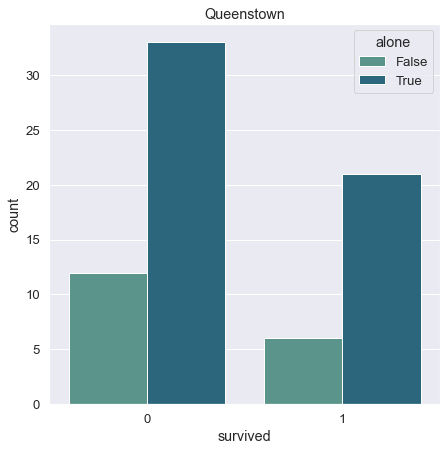

In [23]:
sns.countplot(x='survived', data =tw1, hue='alone', palette='crest').set_title('Queenstown')

# town 2

In [24]:
tw2 = df[ (df['embark_town'] == 'Cherbourg') & (df['class'] == 'First')]
ag0 = tw2[tw2['survived'] == 0]
ag1 = tw2[tw2['survived'] == 1]

Text(0.5, 1.0, 'Alive')

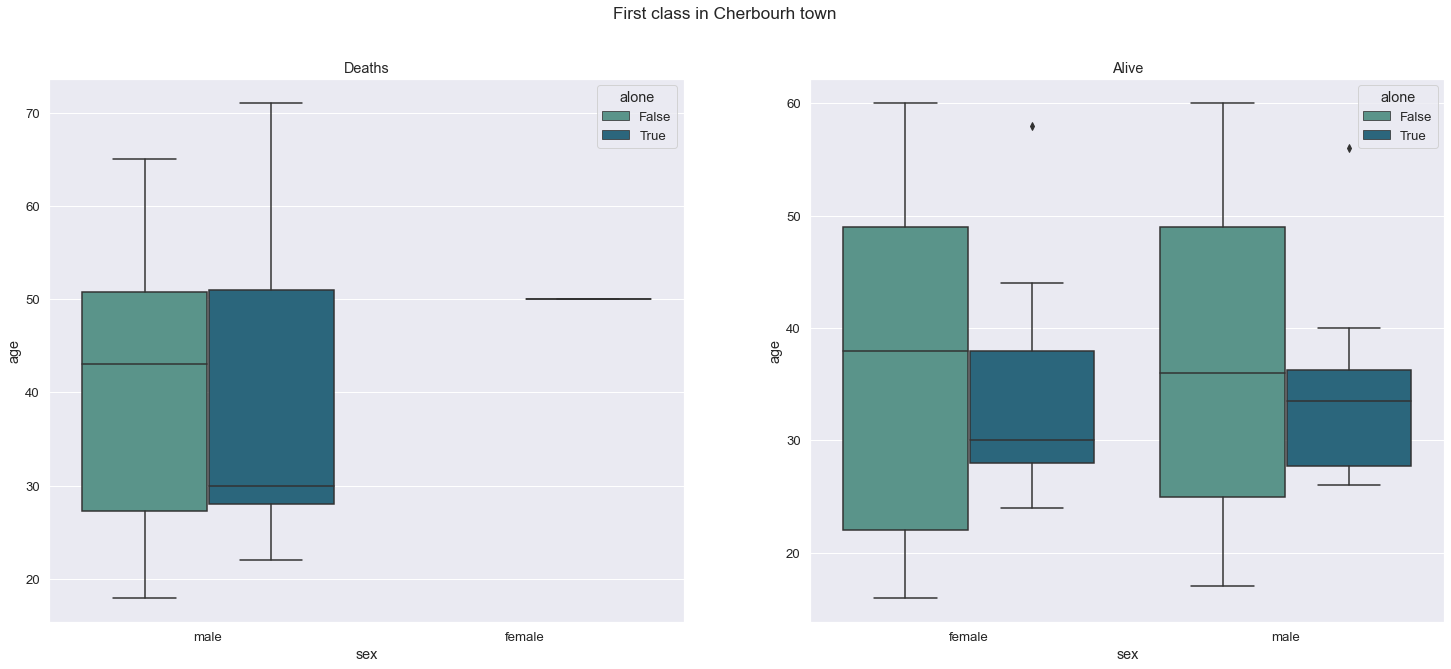

In [25]:
fig, axes = plt.subplots(1,2 , figsize= (25,10)) 
fig.suptitle ('First class in Cherbourh town')
sns.boxplot(ax=axes [0] ,x='sex',y = 'age',data=ag0, hue='alone',palette='crest').set_title('Deaths')
sns.boxplot(ax=axes [1] ,x='sex',y = 'age',data=ag1, hue='alone',palette='crest').set_title('Alive')

Text(0.5, 1.0, 'Cherbourh')

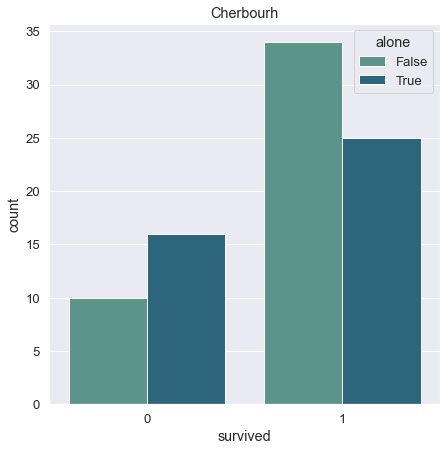

In [26]:
sns.countplot(x='survived', data =tw2, hue='alone', palette='crest').set_title('Cherbourh')

# town 3

In [27]:
tw3 = df[ (df['embark_town'] == 'Southampton') & (df['class'] == 'First')]
ag30 = tw3[tw3['survived'] == 0]
ag31 = tw3[tw3['survived'] == 1]


Text(0.5, 1.0, 'Alive')

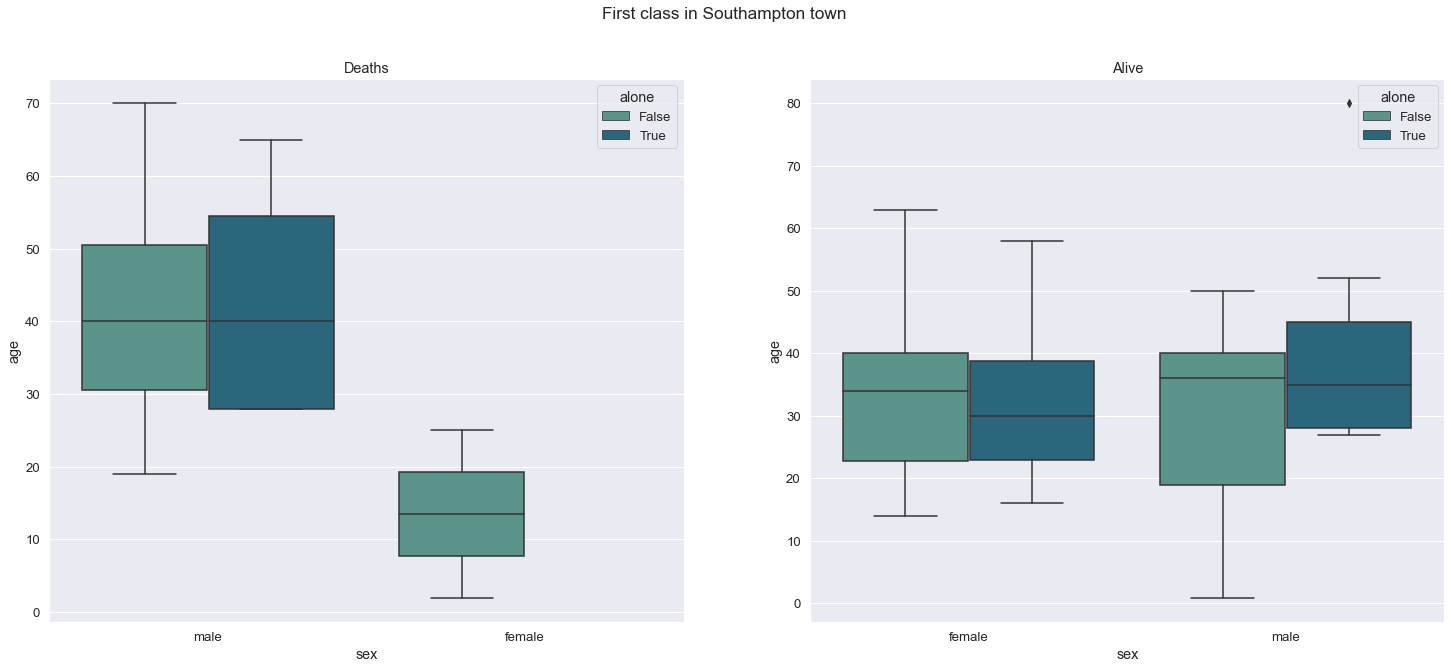

In [28]:
fig, axes = plt.subplots(1,2 , figsize= (25,10)) 
fig.suptitle ('First class in Southampton town')
sns.boxplot(ax=axes [0] ,x='sex',y = 'age',data=ag30, hue='alone',palette='crest').set_title('Deaths')
sns.boxplot(ax=axes [1] ,x='sex',y = 'age',data=ag31, hue='alone',palette='crest').set_title('Alive')

Text(0.5, 1.0, 'Southampton')

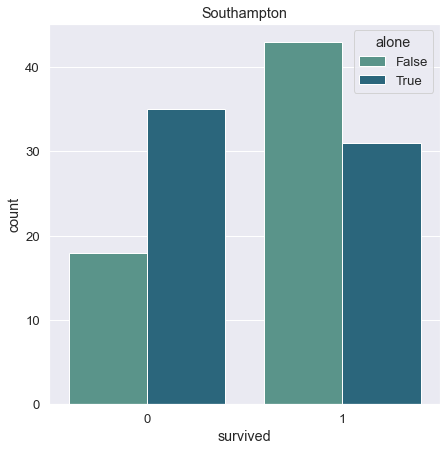

In [29]:
sns.countplot(x='survived', data =tw3, hue='alone', palette='crest').set_title('Southampton')

In [30]:
df.corr()

,survived,age,fare,alone
survived,1.000000,-0.064910,0.257307,-0.203367
age,-0.064910,1.000000,0.096688,0.171647
fare,0.257307,0.096688,1.000000,-0.271832
alone,-0.203367,0.171647,-0.271832,1.000000


<AxesSubplot:>

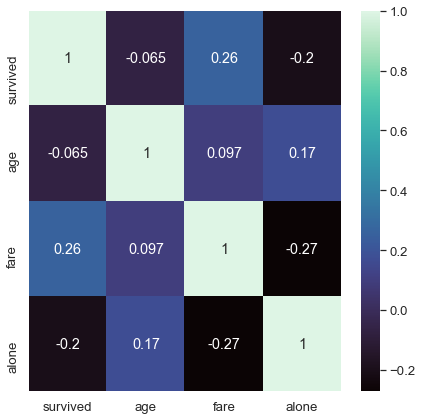

In [31]:
sns.heatmap(df.corr(),annot = True,cmap= 'mako')

In [32]:
df['class'].unique()

array(['Third', 'First', 'Second'], dtype=object)

In [33]:
df['class'] = df['class'].replace(['Third','First','Second'],[3,1,2]) #تم التحويل لاظهار هل هناك علاقة ام لا  

<AxesSubplot:>

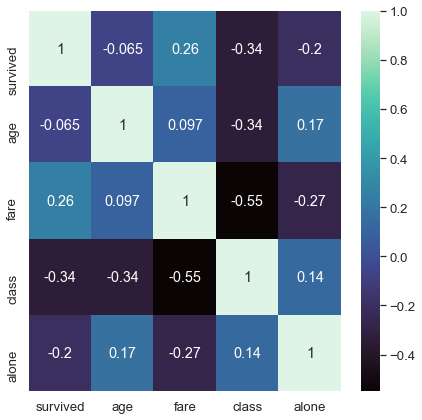

In [34]:
sns.heatmap(df.corr(),annot = True,cmap='mako')

# Is there correlation between alone , class?

<AxesSubplot:>

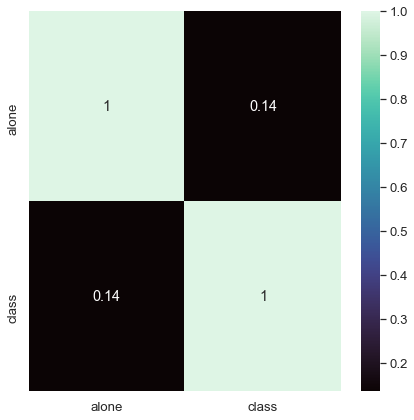

In [35]:
corr1 = df.corr()[['alone','class']].loc[['alone','class']]
sns.heatmap(corr1,annot=True,cmap= 'mako')

# Is there correlation between survived , fare?

<AxesSubplot:>

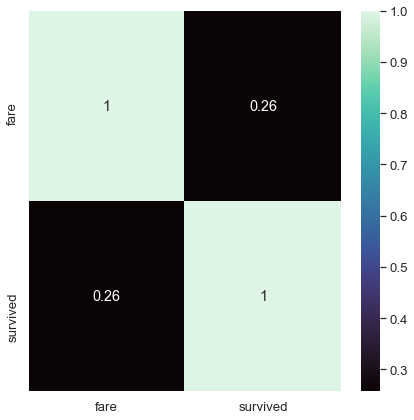

In [36]:
corr2 = df.corr()[['fare','survived']].loc[['fare','survived']]
sns.heatmap(corr2,annot=True,cmap='mako')

In [37]:
round(df[df['who'] == 'man']['who'].count()/df.shape[0]*100,2)

60.27

In [38]:
round(df[df['who'] == 'woman']['who'].count()/df.shape[0]*100,2)

30.42

In [39]:
round(df[df['who'] == 'child']['who'].count()/df.shape[0]*100,2)

9.32

In [40]:
round(df[(df['who'] == 'man') & (df['survived'] == 0)]['who'].count()/df[df['who'] == 'man'].shape[0]*100,2)

83.61

In [41]:
round(df[(df['who'] == 'man') & (df['survived'] == 0) & df['alone'] == True].shape[0]/df[(df['who'] == 'man') & (df['survived'] == 0)].shape[0]*100,2)

77.06

In [42]:
round(df[(df['who'] == 'man') & (df['class'] == 3)].shape[0]/df[df['class'] ==3].shape[0]*100,2)

64.97

In [43]:
df['embark_town'] = df['embark_town'].replace(['Southampton','Cherbourg','Queenstown','No town'],[1,2,3,4])


In [44]:
df

,survived,sex,age,fare,class,who,embark_town,alive,alone
0,0,male,22.0,7.2500,3,man,1,no,False
1,1,female,38.0,71.2833,1,woman,2,yes,False
2,1,female,26.0,7.9250,3,woman,1,yes,True
3,1,female,35.0,53.1000,1,woman,1,yes,False
4,0,male,35.0,8.0500,3,man,1,no,True
...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,13.0000,2,man,1,no,True
887,1,female,19.0,30.0000,1,woman,1,yes,True
888,0,female,28.0,23.4500,3,woman,1,no,False
889,1,male,26.0,30.0000,1,man,2,yes,True


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   sex          891 non-null    object 
 2   age          891 non-null    float64
 3   fare         891 non-null    float64
 4   class        891 non-null    int64  
 5   who          891 non-null    object 
 6   embark_town  891 non-null    int64  
 7   alive        891 non-null    object 
 8   alone        891 non-null    bool   
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 56.7+ KB


Text(0.5, 1.0, 'embark_town with Queenstown')

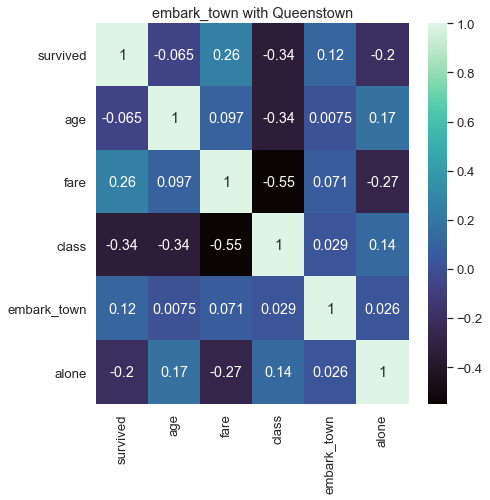

In [53]:
sns.heatmap(df.corr(),annot = True,cmap='mako').set_title('embark_town with Queenstown')

In [47]:
df1 = df[(df['embark_town'] != 3) & (df['embark_town'] != 4)]

In [48]:
df1.corr()

,survived,age,fare,class,embark_town,alone
survived,1.000000,-0.066307,0.270704,-0.360557,0.180615,-0.229180
age,-0.066307,1.000000,0.093074,-0.342436,0.028646,0.175851
fare,0.270704,0.093074,1.000000,-0.537450,0.258913,-0.264017
class,-0.360557,-0.342436,-0.537450,1.000000,-0.222747,0.122028
embark_town,0.180615,0.028646,0.258913,-0.222747,1.000000,-0.085858
alone,-0.229180,0.175851,-0.264017,0.122028,-0.085858,1.000000


Text(0.5, 1.0, 'without Queenstown')

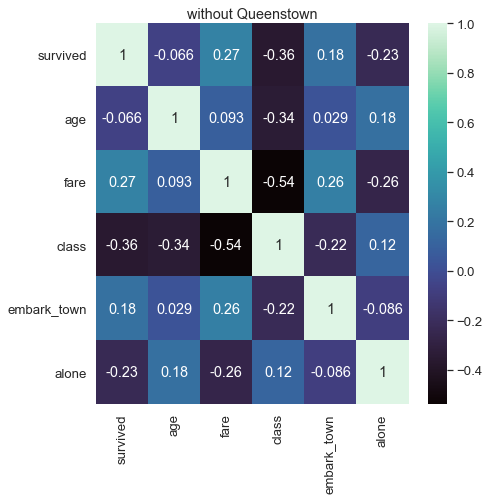

In [54]:
sns.heatmap(df1.corr(),annot = True,cmap='mako').set_title('without Queenstown')

<AxesSubplot:>

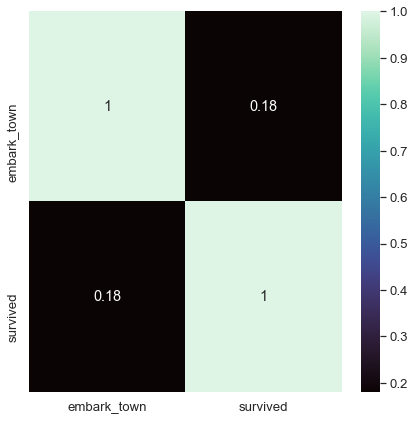

In [50]:
es = df1.corr()[['embark_town','survived']].loc[['embark_town','survived']]
sns.heatmap(es,annot = True,cmap='mako')

<AxesSubplot:>

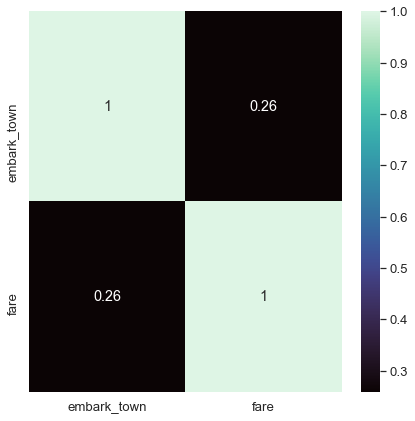

In [51]:
ef = df1.corr()[['embark_town','fare']].loc[['embark_town','fare']]
sns.heatmap(ef,annot = True,cmap='mako')

<AxesSubplot:>

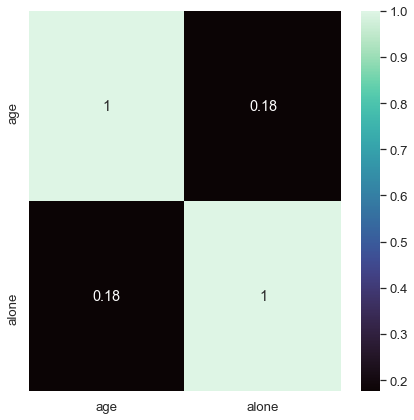

In [52]:
aa = df1.corr()[['age','alone']].loc[['age','alone']]
sns.heatmap(aa,annot = True,cmap='mako')